### DETECTION TRAIN ###

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from YAML
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolov8n.yaml").load("yolov8n.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data="coco8.yaml", epochs=100, imgsz=640)

### PREDICT ###

In [ ]:
from ultralytics import YOLO

# Load the model
model = YOLO("C:/YOLO/yolov8n.pt")  # load an official model
model = YOLO("C:/YOLO/runs/detect/train/weights/best.pt")  # load a custom model

# Predict with the model
results = model("C:/YOLO/runs/detect/images/elephant.jpg")  # predict on an image

# Process and visualize results
for result in results:
    result.show()  # display the image with predictions
    result.save(save_dir='C:/YOLO/runs/detect/predictions')  # save the image with predictions

print("Prediction complete. Check the predictions directory for results.")


### REAL TIME PREDICT ###


0: 480x640 1 person, 156.2ms
Speed: 3.5ms preprocess, 156.2ms inference, 881.8ms postprocess per image at shape (1, 3, 480, 640)


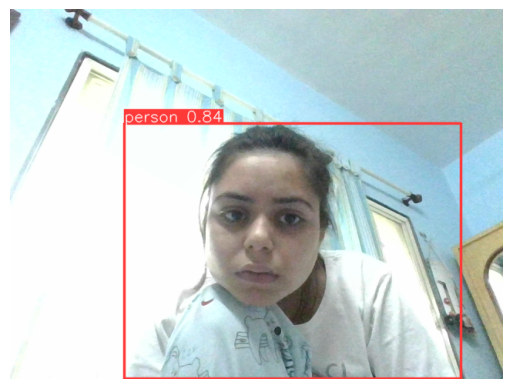

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1338: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [1]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the YOLO model
model = YOLO("C:/YOLO/yolov8n.pt")  # load an official model
# model = YOLO("C:/YOLO/runs/detect/train/weights/best.pt")  # load a custom model

# Initialize the video capture object
cap = cv2.VideoCapture(0)  # 0 is the default camera

# Set up the plot
plt.ion()  # Turn on interactive mode
fig, ax = plt.subplots()

try:
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        if not ret:
            break
        
        # Predict with the model
        results = model(frame)
        
        # Process and visualize results
        for result in results:
            # Plot the results on the frame
            annotated_frame = result.plot()
        
        # Convert BGR to RGB
        annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
        
        # Display the resulting frame
        ax.clear()
        ax.imshow(annotated_frame_rgb)
        ax.axis('off')
        plt.draw()
        plt.pause(0.001)
        
        # Check for 'q' key press to break the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

finally:
    # Release the capture and close the plot
    cap.release()
    plt.close()